# Relationship of Loan Prosper Data Between Monthly Income, Amount of Delinquent and Employment Status of Borrower

## Investigation Overview

I wanted to look relationship between each variables in loan data prosper especially the variable of monthly income, amount of delinquent, employment status and also the connection between those variables. We would like to know the behavior of each borrower who borrow the money, does each variable will have big impact to each borrower or not.

## Dataset Overview

This data set consist of some variables for instance loan amount, loan status, borrower rate, borrower income and so many more. It contains 113937 loan data with 81 variables as been mentioned earlier. From these 81 variables, 15-18 variables have been chosen for further analysis. We would like to know each behavior of borrower as well as the loan variables which affects it. The selected variables has been wrangled by some kind of action for instance drop unnecessary column which less concerned for further analysis, drop the nan value which is existed inside the data, identify the duplicates and drop it, and also change/modify the data type of some data series/columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('forexplanatory.csv')
df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CurrentDelinquencies,AmountDelinquent,IncomeRange,StatedMonthlyIncome,PercentFunded,Recommendations,Investors
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,2,2.0,472,"$25,000-49,999",3083.333333,1.0,0,258
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,2,CO,Professional,Employed,44,0.0,0,"$50,000-74,999",6125.000000,1.0,0,1
2,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,113,4.0,10056,"$25,000-49,999",2875.000000,1.0,0,158
3,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,2,MN,Executive,Employed,44,0.0,0,"$100,000+",9583.333333,1.0,0,20
4,1074836,2013-12-14 08:26:37.093000000,60,Current,0.15425,0.1314,1,NM,Professional,Employed,82,0.0,0,"$100,000+",8333.333333,1.0,0,1


## Distribution of Borrower Monthly Income

Mostly the borrower monthly income is around 4000-5000 dollars. There is also found an outlier since if we do calculate the statistic data, there is someone who borrow the money whose monthly income is up to 1750000 dollars.

Text(0.5,1,'Distribution of Monthly Income')

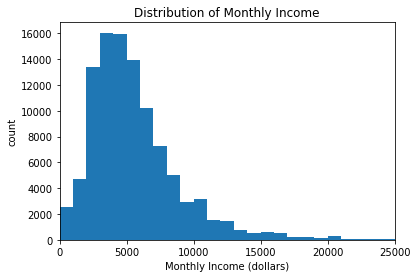

In [3]:
bins=np.arange(0,1.75*10**6+1000,1000)
plt.hist(data=df,x='StatedMonthlyIncome',bins=bins)
plt.xlabel('Monthly Income (dollars)')
plt.ylabel('count')
plt.xlim(0,25000)
plt.title('Distribution of Monthly Income')

## Distribution of Delinquent Amount

According to the histogram, the distribution of amount delinquent data is normal. Since there is 0 value in amount of delinquent and we just only need the amount of delinquent, we need to filter the value first, then we plot the histogram and it is also used scale transformation by using log, therefore the data could be distributed well. Move to the content of histogram, we could clearly see that mostly the amount delinquent value is around 100-1000 USD

In [4]:
dfad=df.query('AmountDelinquent!=0')
np.log10(dfad['AmountDelinquent'].describe())

count    4.193764
mean     3.807541
std      4.240167
min      0.000000
25%      2.387390
50%      3.026942
75%      3.708506
max      5.666407
Name: AmountDelinquent, dtype: float64

Text(0.5,1,'Distribution of Delinquent Amount')

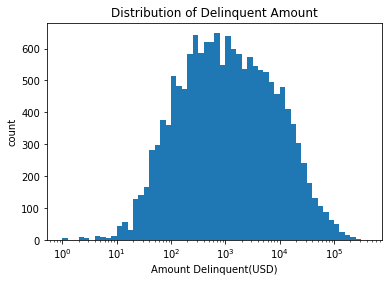

In [6]:
bins=10**(np.arange(0,5.6+0.1,0.1))
plt.hist(data=dfad,x='AmountDelinquent',bins=bins)
plt.xlabel('Amount Delinquent(USD)')
ticks=[0,1,3,10,30,100,300,1000,3000,10000,30000,100000]
plt.xticks(ticks,ticks)
plt.xscale('log')
plt.ylabel('count')
plt.title('Distribution of Delinquent Amount')

## Relationship Between Amount of Delinquent and Monthly Income

According to the scatter plot, the amount deliquency has tendency to be lower with the increase value of borrowers monthly income. It does make sense if the borrower has higher income, they could pay the deliquent therefore they don't have any debt anymore. However it is still found that some borrowers whose income is higher has higher debt as well.

Text(0.5,1,'Relationship Between Monthly Income and Amount of Delinquent')

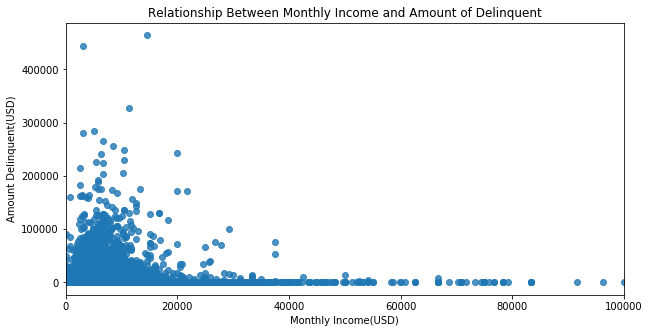

In [7]:
plt.figure(figsize=[10,5])
sb.regplot(data=df,x='StatedMonthlyIncome',y='AmountDelinquent',fit_reg=False)
plt.xlabel('Monthly Income(USD)')
plt.ylabel('Amount Delinquent(USD)')
plt.xlim(0,100000)
plt.title('Relationship Between Monthly Income and Amount of Delinquent')

## Relationship Between Monthly Income, Amount of Delinquent and Employment Status of Borrower

According to above multivariate plot between monthly income, amount of delinquent and employment status, We could know that the higher monthly income, it will result in the lower of amount delinquent. And if this condition connected to borrower status employment, the employed borrower tends to have higher amount of delinquent and higher quantity of the borrower from any other type of employment. Then in second place is followed by full time borrower, there are also some full timer whose amount delinquent as high as employed type yet the data not so many and so spread as employed type. And there is also small amount of selm-employed borrower whise amount of delinquent is as high as the two type borrowers (employed and full time) however the quantity is very tiny. Laslty the retired type of borrower has lower amount of delinquent if it s compared to full time, employed and self employed.

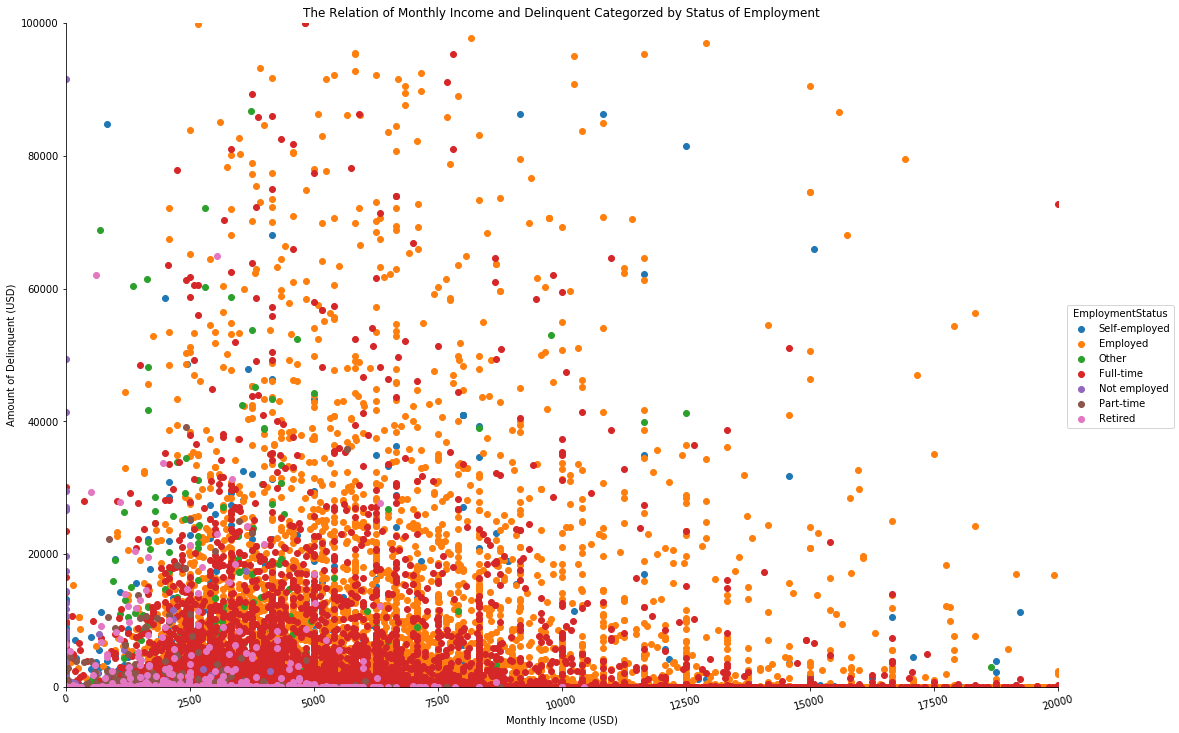

In [8]:
g=sb.FacetGrid(data=df,hue='EmploymentStatus',size=10,aspect=1.5)
g.map(plt.scatter,'StatedMonthlyIncome','AmountDelinquent')
plt.xticks(rotation=15)
g.add_legend()
plt.xlim(0,20000)
plt.ylim(0,100000)
def xytitle(xL,yL,title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(title)
    
xytitle('Monthly Income (USD)','Amount of Delinquent (USD)','The Relation of Monthly Income and Delinquent Categorzed by Status of Employment')


### Generate Slideshow
Run the command below to generate the HTML slideshow.

In [9]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_slide_deck_template_new.ipynb --to slides --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck_template_new.ipynb to slides
[NbConvertApp] Writing 537262 bytes to Part_II_slide_deck_template_new.slides.html



>In the classroom workspace, the generated HTML slideshow will be placed in the home folder.

>In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. 